<a href="https://colab.research.google.com/github/ProboKrishnacahya/Machine_Learning/blob/main/Week_3_Supervised_Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0706012010039 - Probo Krishnacahya
**IMT01306601-A Machine Learning**

Assignment 2: Regression

# Week 3: Supervised Machine Learning (Regression)
---
***Panduan menyelesaikan permasalahan Supervised Machine Learning***

# Regression
Regresi dan Klasifikasi dikategorikan di bawah payung yang sama dari supervised machine learning. Keduanya memiliki konsep yang sama dalam memanfaatkan kumpulan data training untuk membuat prediksi.<br>
Perbedaan utama di antara Regresi dan Klasifikasi adalah bahwa variabel keluaran dalam regresi adalah numerik (atau kontinu) sedangkan untuk klasifikasi bersifat kategorikal (atau diskrit).

## Simple Liner Regression

### Import library yang diperlukan

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

### Load Dataset

In [2]:
sales_call = [20, 40, 20, 30, 10, 10, 20, 20, 20, 30]
copier_sold = [30, 60, 40, 60, 30, 40, 40, 50, 30, 70]

df = pd.DataFrame({"Sales Call": sales_call, "Copier Sold": copier_sold})

### Membuat model persamaan regresi dengan Scipy

In [3]:
result = st.linregress(sales_call, copier_sold)

print("Koefisien Korelasi: {:0.4f}".format(result.rvalue)) 
print("Koefisien Determinasi: {:0.4f}".format(np.power(result.rvalue, 2)))

print("Model persamaan regresi nya: y = {0:0.4f} X + {1:0.4f}".format(result.slope, result.intercept))

Koefisien Korelasi: 0.7590
Koefisien Determinasi: 0.5761
Model persamaan regresi nya: y = 1.1842 X + 18.9474


### Menampilkan garis regresi

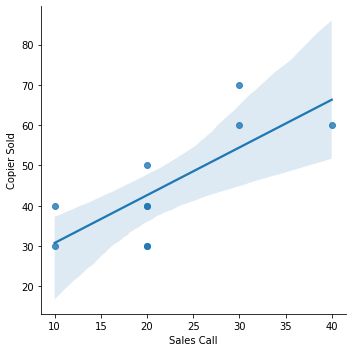

In [4]:
sns.lmplot(x="Sales Call", y="Copier Sold", data=df)
plt.show()

### Prediksi Copier Sold
Jika seorang sales melakukan 20 calls

In [5]:
X = 20
y_pred = result.slope * X + result.intercept

print("Jika seorang sales melakukan 20 calls, jumlah Copier Sold diprediksi: {:0.4f}".format(y_pred))

Jika seorang sales melakukan 20 calls, jumlah Copier Sold diprediksi: 42.6316


## Exercise 1: Simple Linear Regression
Pada sebuah perusahaan terdapat data antara Years of Experience sebagai Independent Variable dan Salary sebagai Dependent Variable.<br>
Model regresi linier sederhana: y=β0​+β1​x+ε<br>
`url = "https://raw.githubusercontent.com/twiradinata/datasets/main/salary_data.csv"`<br>
Tentukan model persamaan regresi linier nya.

In [6]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/twiradinata/datasets/main/salary_data.csv")
dataframe.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exercise 2: Simple Linear Regression
Sebuah Gym melakukan pengukuran member yang rutin melakukan treadmill dengan jumlah kalori yang dibakar. 
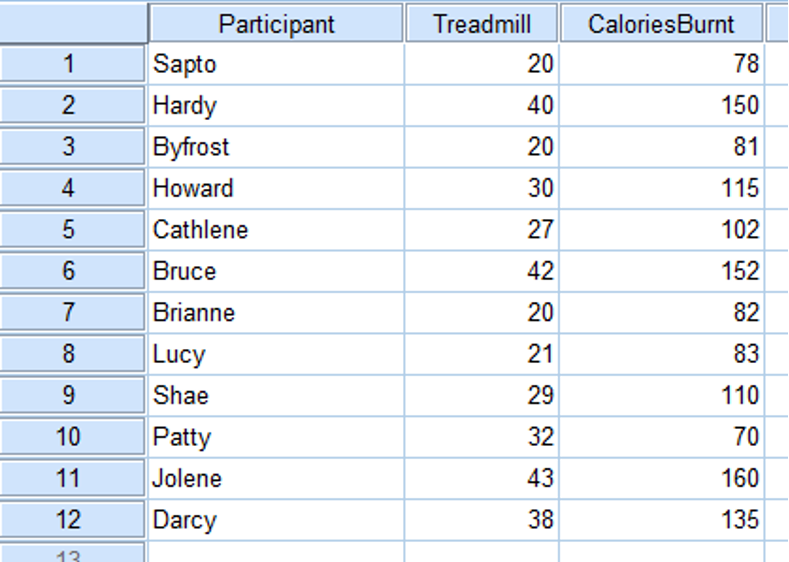
<br>Dengan script python:
* Hitunglah Koefisien Korelasi dan Koefisien Determinasi
* Apakah korelasi nya significant?
* Tentukan model persamaan regresi nya
* Lakukan prediksi berapa kalori yang dibakar jika seorang member melakukan treadmill selama 35 menit.

In [7]:
treadmill = [20, 40, 20, 30, 27, 42, 20, 21, 29, 32, 43, 38]
calories_burnt = [78, 150, 81, 115, 102, 152, 82, 83, 110, 70, 160, 135]

result = st.linregress(treadmill, calories_burnt)

print("Koefisien Korelasi: {:0.4f}".format(result.rvalue)) 
print("Koefisien Determinasi: {:0.4f}".format(np.power(result.rvalue, 2)))

print("Model persamaan regresi nya: y = {0:0.4f} X + {1:0.4f}".format(result.slope, result.intercept))

X = 35
y_pred = result.slope * X + result.intercept

print("Jika seorang member melakukan treadmill selama 35 menit, jumlah kalori yang dibakar diprediksi: {:0.4f}".format(y_pred))

Koefisien Korelasi: 0.8921
Koefisien Determinasi: 0.7959
Model persamaan regresi nya: y = 3.2482 X + 11.8465
Jika seorang member melakukan treadmill selama 35 menit, jumlah kalori yang dibakar diprediksi: 125.5329




---



## Multiple Linear Regression Analysis (Heating Cost)

### Import Library yang diperlukan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [9]:
temperature = [35,29,36,60,65,30,10,7,21,55,54,48,20,39,60,20,58,40,27,30]
insulation = [3,4,7,6,5,5,6,10,9,2,12,5,5,4,8,5,7,8,9,7]
age_of_furnace = [6,10,3,9,6,5,7,10,11,5,4,1,15,7,6,8,3,11,8,5]
heating_cost = [250,360,165,43,92,200,355,290,230,120,73,205,400,320,72,272,94,190,235,139]

df = pd.DataFrame({"temperature": temperature, "insulation": insulation, 
                   "age of furnace": age_of_furnace, "heating cost": heating_cost})
df.head()

,temperature,insulation,age of furnace,heating cost
0,35,3,6,250
1,29,4,10,360
2,36,7,3,165
3,60,6,9,43
4,65,5,6,92


### Exploratory Data Analysis (Univariate)

In [10]:
df.describe()

,temperature,insulation,age of furnace,heating cost
count,20.000000,20.000000,20.000000,20.000000
mean,37.200000,6.350000,7.000000,205.250000
std,17.410221,2.476734,3.340344,105.858831
min,7.000000,2.000000,1.000000,43.000000
25%,25.500000,5.000000,5.000000,113.500000
50%,35.500000,6.000000,6.500000,202.500000
75%,54.250000,8.000000,9.250000,276.500000
max,65.000000,12.000000,15.000000,400.000000


### Exploratory Data Analysis (Multivariate)

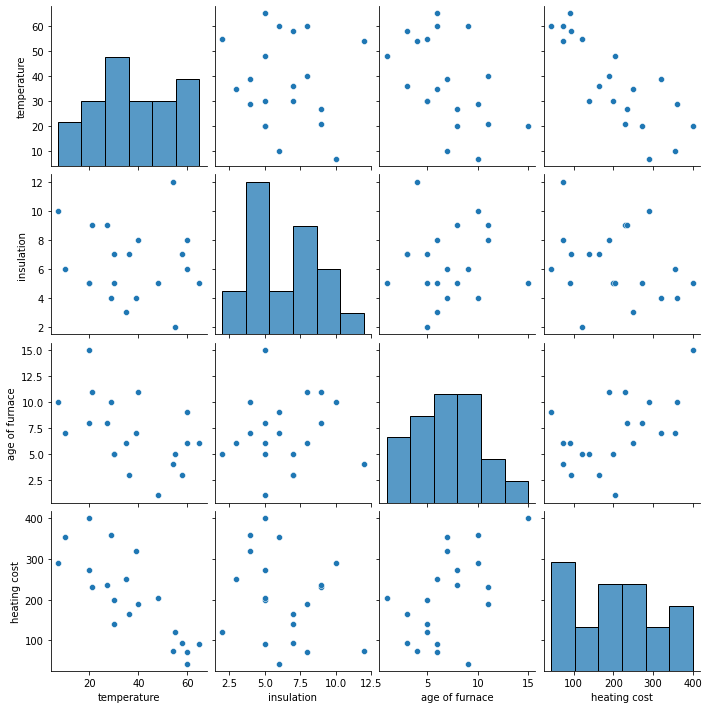

In [11]:
sns.pairplot(data=df)
plt.show()

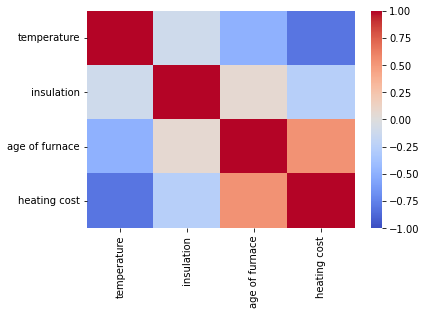

In [12]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

### Tentukan variabel independent dan dependent nya

In [13]:
X = df[["temperature", "insulation", "age of furnace"]]
y = df["heating cost"]

### Membuat model persamaan Regresi dari seluruh data

In [14]:
from sklearn.linear_model import LinearRegression

result = LinearRegression()
result.fit(X, y)

print("Intercept: {:0.4f}".format(result.intercept_))
print("Coefficient b1: {:0.4f}".format(result.coef_[0]))
print("Coefficient b2: {:0.4f}".format(result.coef_[1]))
print("Coefficient b3: {:0.4f}".format(result.coef_[2]))

Intercept: 427.1938
Coefficient b1: -4.5827
Coefficient b2: -14.8309
Coefficient b3: 6.1010


### Prediksi Heating Cost
Jika Outside Temp = 30, Attic Insulation = 5, Age of Furnace = 10

In [15]:
result.predict([[30, 5, 10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([276.56993172])

## Multiple Linear Regression Analysis (Advertising Cost)

### Import Library yang diperlukan

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset
Dataset yang digunakan memiliki informasi biaya beriklan di TV, Radio, dan Surat Kabar beserta dengan catatan Sales yang dihasilkan pada periode tertentu.

In [17]:
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/advertising.csv"
dataset = pd.read_csv(url)
dataset = dataset[['TV', 'Radio', 'Newspaper', 'Sales']]

In [18]:
dataset.shape

(200, 4)

### Exploratory Data Analysis (Univariate)

In [19]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


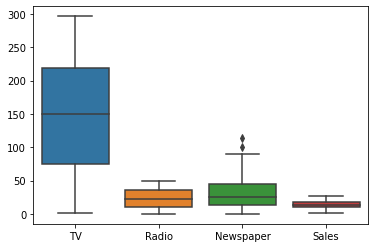

In [20]:
sns.boxplot(data=dataset)

### Exploratory Data Analysis (Multivariate)

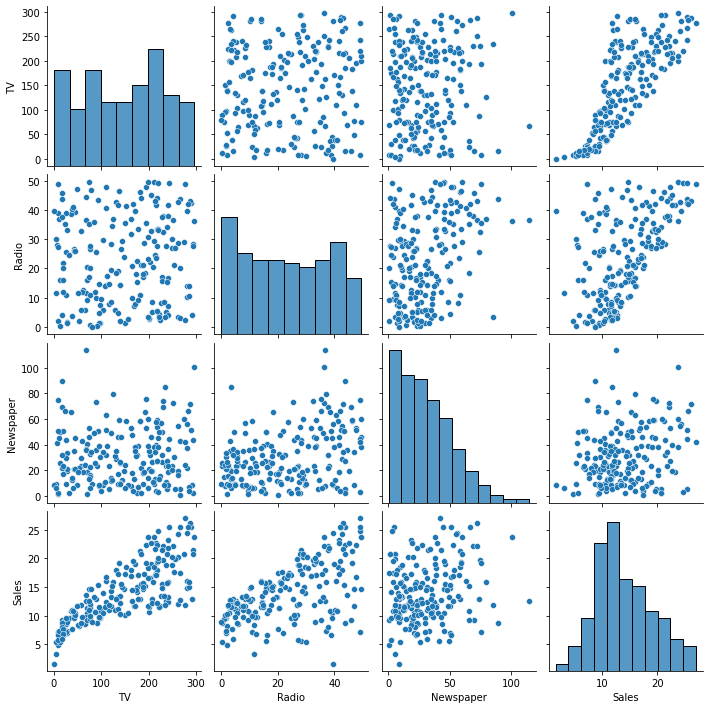

In [21]:
sns.pairplot(dataset)
plt.show()

### Tentukan variabel independent dan dependent nya

In [22]:
# Asumsi X adalah features yang diletakkan di kolom kiri mulai index 1, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

### Split dataset menjadi data Training dan data Test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [24]:
print(X_test)

[[ 69.2  20.5  18.3]
 [ 50.   11.6  18.4]
 [ 90.4   0.3  23.2]
 [289.7  42.3  51.2]
 [170.2   7.8  35.2]
 [ 56.2   5.7  29.7]
 [  8.7  48.9  75. ]
 [240.1   7.3   8.7]
 [ 23.8  35.1  65.9]
 [197.6  23.3  14.2]
 [261.3  42.7  54.7]
 [ 87.2  11.8  25.9]
 [156.6   2.6   8.3]
 [187.8  21.1   9.5]
 [ 76.4  26.7  22.3]
 [120.2  19.6  11.6]
 [265.6  20.    0.3]
 [  0.7  39.6   8.7]
 [ 74.7  49.4  45.7]
 [213.4  24.6  13.1]
 [287.6  43.   71.8]
 [140.3   1.9   9. ]
 [175.1  22.5  31.5]
 [131.7  18.4  34.6]
 [ 53.5   2.   21.4]
 [123.1  34.6  12.4]
 [165.6  10.   17.6]
 [205.   45.1  19.6]
 [224.    2.4  15.6]
 [ 25.1  25.7  43.3]
 [ 67.8  36.6 114. ]
 [198.9  49.4  60. ]
 [280.7  13.9  37. ]
 [241.7  38.   23.2]
 [ 13.2  15.9  49.6]
 [ 18.7  12.1  23.4]
 [ 59.6  12.   43.1]
 [180.8  10.8  58.4]
 [ 68.4  44.5  35.6]
 [ 25.   11.   29.7]]


### Membuat model persamaan Regresi berdasarkan data Training

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Uji coba model persamaan berdasarkan data anonymous

In [26]:
# Prediksikan apabila biaya beriklan di TV 150, Radio 41, Newspaper 58, berapa Sales yang dihasilkan?
np.set_printoptions(precision=4)
print(regressor.predict([[150, 41, 58]]))

[17.5775]


### Uji hasil prediksi dengan data Test

In [27]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), 
                        columns=["Prediction", "Test"])
evaluate.head()

,Prediction,Test
0,10.057396,11.3
1,7.452281,8.4
2,7.019708,8.7
3,24.080297,25.4
4,12.017863,11.7


### Evaluating Goodness of Fit using RMSE

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Percentage Error (MAPE): ", mean_absolute_percentage_error(y_test, y_pred))
print("Coefficient of Determination (R2): ", r2_score(y_test, y_pred))

Root Mean Squared Error (RMSE):  2.0981225634956804
Mean Absolute Percentage Error (MAPE):  0.24610850610005608
Coefficient of Determination (R2):  0.8601145185017868


## Exercise: Multiple Linear Regression Analysis

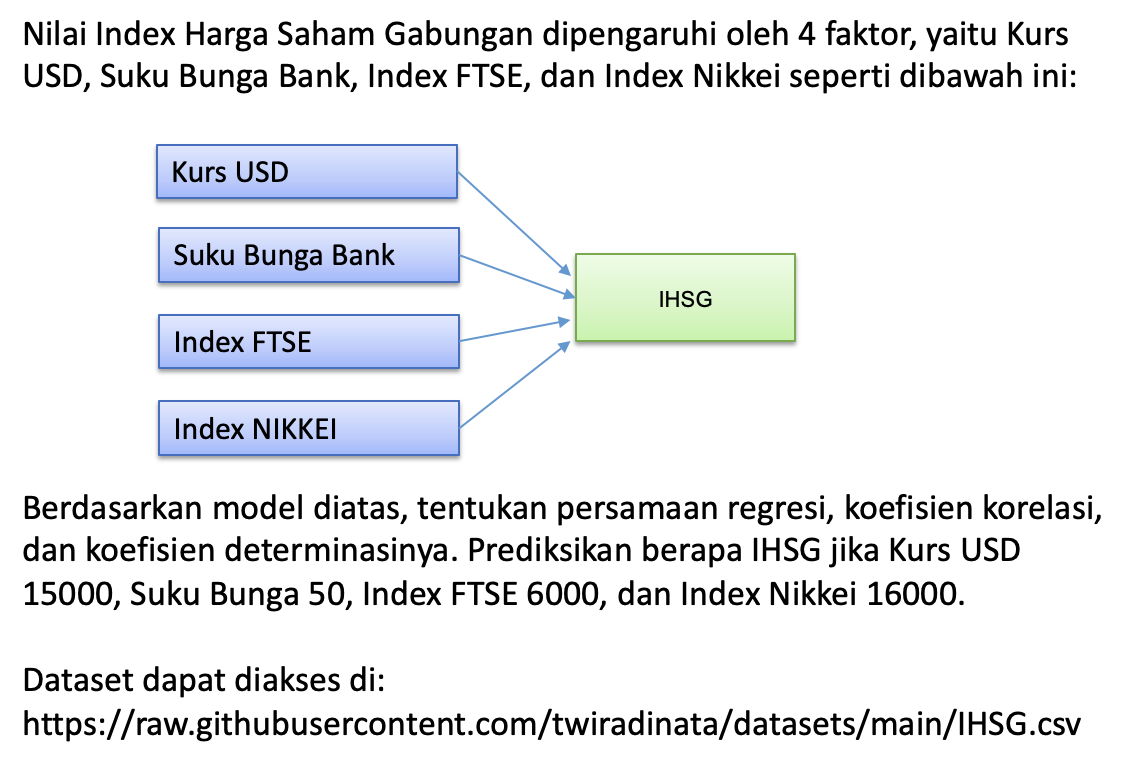

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/twiradinata/datasets/main/IHSG.csv", delimiter=';')
df.head()

,Kurs USD,Suku Bunga Bank,Index FTSE,Index NIKKEI,IHSG
0,11000,20,5138,16424,342
1,8800,22,5629,14995,535
2,8550,25,5782,17040,512
3,8150,45,6105,17132,527
4,11150,58,5969,16481,434


# Polynomial Regression
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable X and the dependent variable y is modelled as an n-th degree polynomial in X.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [43]:
X = df[['Kurs USD', 'Suku Bunga Bank', 'Index FTSE', 'Index NIKKEI']]
y = df["IHSG"]

result = LinearRegression()
result.fit(X, y)

LinearRegression()

In [44]:
print("Intercept: {:0.4f}".format(result.intercept_))
print("Coefficient b1: {:0.4f}".format(result.coef_[0]))
print("Coefficient b2: {:0.4f}".format(result.coef_[1]))
print("Coefficient b3: {:0.4f}".format(result.coef_[2]))

# Prediksi jika kurs USD 15000, Suku Bunga 50, Index FTSE 6000, dan Index Nikkei 16000.
print(result.predict([[15000, 50, 6000, 16000]]))

Intercept: -231.4536
Coefficient b1: -0.0228
Coefficient b2: 0.0379
Coefficient b3: 0.0829
[328.8713]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [45]:
url = 'https://raw.githubusercontent.com/twiradinata/datasets/main/position_salaries.csv'
dataset = pd.read_csv(url)
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


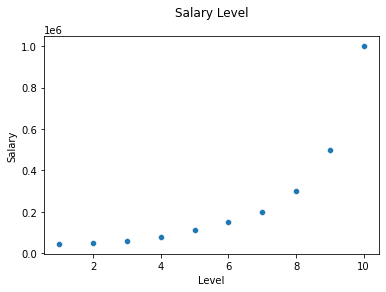

In [46]:
plt.title('Salary Level', pad=20)
sns.scatterplot(data=dataset, x='Level', y='Salary')
plt.show()

Find the error (RMSE) and r2 using both Linear and Polynomial Regression. Is there any differences?

In [54]:
level = dataset['Level']
salary = dataset['Salary']

regressor = LinearRegression()
regressor.fit(dataset.iloc[:, 1].values.reshape(-1, 1), dataset.iloc[:, -1].values.reshape(-1, 1))

y_pred = regressor.predict(dataset.iloc[:, 1].values.reshape(-1, 1))

print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(salary, y_pred)))
print("Coefficient of Determination (R2): ", r2_score(salary, y_pred))

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(dataset.iloc[:, 1].values.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, salary)
y_pred = poly_reg_model.predict(poly_features)

print("")
print(y_pred)
print("\nRoot Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(salary, y_pred)))
print("Coefficient of Determination (R2):", r2_score(salary, y_pred))

Root Mean Squared Error (RMSE):  163388.73519272613
Coefficient of Determination (R2):  0.6690412331929895

[118727.2727  44151.5152   8439.3939  11590.9091  53606.0606 134484.8485
 254227.2727 412833.3333 610303.0303 846636.3636]

Root Mean Squared Error (RMSE): 82212.12400451246
Coefficient of Determination (R2): 0.9162082221443942
